In [23]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, Aer, transpile, assemble, IBMQ
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction

import pylab
from qiskit.utils import QuantumInstance
from qiskit.tools.visualization import plot_histogram
from qiskit.algorithms import Grover, AmplificationProblem
from qiskit.circuit.library.phase_oracle import PhaseOracle


print("Imports Successful")

provider = IBMQ.load_account()

Imports Successful


ibmqfactory.load_account:WARNING:2022-01-31 18:39:52,077: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
cloudBackends = provider.backends()
for backend in cloudBackends:
    print(backend)
    
print()
    
for localBackend in Aer.backends():
    print(localBackend)

ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [9]:
circ = QuantumCircuit(1,1)
circ.h(0)
measurement = QuantumCircuit(1,1)
measurement.measure(0,0)
qc = circ.compose(measurement)

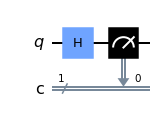

In [10]:
qc.draw()

In [15]:
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(transpile(qc, simulator), shots=100000)
result = job.result()
print(result.get_counts(qc))

{'1': 49810, '0': 50190}


In [17]:
qComputer = provider.get_backend('ibmq_quito')
job = simulator.run(transpile(qc, simulator), shots=100000)
result = job.result()
print(result.get_counts(qc))

{'0': 49813, '1': 50187}


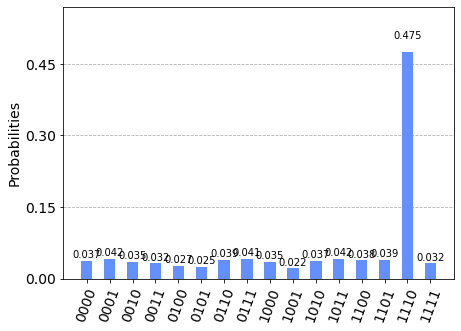

In [25]:
# Trying out the code from https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/algorithms/07_grover_examples.ipynb
#
# I want to use 3-SAT solver for solving a graph theoretic problem, this should be possible via reduction!
#
#

#Solve a 3-SAT expression on the simulator
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(quantum_instance=QuantumInstance(Aer.get_backend('aer_simulator'), shots=1024))
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)



/opt/conda/lib/python3.8/site-packages/qiskit/utils/run_circuits.py:727: UserWarning: max_credits is not a recognized runtime option and may be ignored by the backend.
  return backend.run(circuits, **run_kwargs)


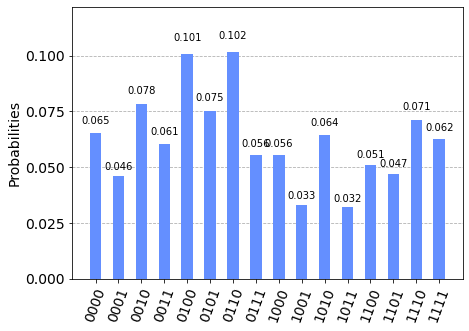

In [29]:
# Solve a 3-SAT expression on a real machine
expression = '(w ^ x) & ~(y ^ z) & (x & y & z)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(quantum_instance=QuantumInstance(provider.get_backend('ibmq_quito'), shots=1024))
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)
    

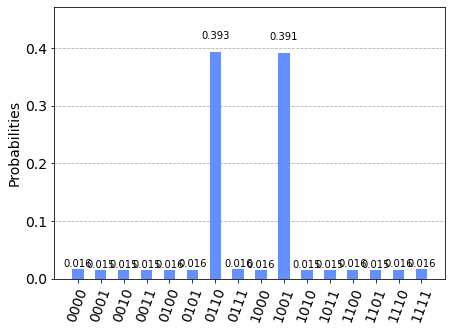

In [35]:
expression = '(x1v1 ^ x1v2) & (x2v1 ^ x2v2) & (~x1v1 ^ ~x2v1) & (~x1v2 ^ ~x2v2)'
try:
    oracle = PhaseOracle(expression)
    problem = AmplificationProblem(oracle, is_good_state=oracle.evaluate_bitstring)
    grover = Grover(quantum_instance=QuantumInstance(Aer.get_backend('aer_simulator'), shots=100000))
    result = grover.amplify(problem)
    display(plot_histogram(result.circuit_results[0]))
except MissingOptionalLibraryError as ex:
    print(ex)